<a href="https://colab.research.google.com/github/t1p0kgod/DeepLearn/blob/main/work2/%D0%97%D0%BE%D0%BB%D0%BE%D1%82%D0%BA%D0%BE%D0%B2_2_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Построение глубокой нейронной сети для решения задачи прогнозирования цен на недвижимость в городе Бостон (регрессия)

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

tf.random.set_seed(1)

model = Sequential([
    Dense(4, input_shape=(8,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.get_weights()

[array([[-0.29570195, -0.48905972, -0.41874412, -0.690184  ],
        [-0.67021716, -0.23791829,  0.6151561 ,  0.2994352 ],
        [-0.30474564, -0.37667665,  0.65536743, -0.27949917],
        [ 0.2713281 , -0.6244143 ,  0.44163877, -0.2926419 ],
        [-0.52252096, -0.6170624 ,  0.45939356, -0.29975462],
        [-0.67965335, -0.39095062,  0.30945188, -0.37218836],
        [-0.23067123,  0.457864  ,  0.2175175 , -0.5598649 ],
        [-0.05252826, -0.16507912, -0.6209497 ,  0.48861295]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.54829675,  0.7707003 , -0.3358758 , -0.8374422 ],
        [-0.4009576 ,  0.7562781 ,  0.39349312,  0.71847564],
        [-0.1445939 , -0.37142673,  0.23892707,  0.07324195],
        [ 0.59133357,  0.09794915, -0.12974739,  0.7305859 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.02569962],
        [ 0.03299522],
        [ 0.25145411],
        [ 0.98065066]], dtype=float32),
 array([0.], dtyp

#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
history = model.fit(X_train, y_train, epochs=8, validation_split=0.05, batch_size=512)

Epoch 1/8
31/31 [==============================] - 3s 16ms/step - loss: 9439.7656 - mae: 78.8250 - val_loss: 5424.3350 - val_mae: 60.8361
Epoch 2/8
31/31 [==============================] - 0s 9ms/step - loss: 3566.9597 - mae: 47.9717 - val_loss: 2034.6700 - val_mae: 36.9895
Epoch 3/8
31/31 [==============================] - 0s 8ms/step - loss: 1348.9615 - mae: 29.1226 - val_loss: 766.8735 - val_mae: 22.4236
Epoch 4/8
31/31 [==============================] - 0s 7ms/step - loss: 558.6635 - mae: 18.7071 - val_loss: 457.3317 - val_mae: 17.1638
Epoch 5/8
31/31 [==============================] - 0s 5ms/step - loss: 415.6777 - mae: 16.0019 - val_loss: 362.4708 - val_mae: 15.1963
Epoch 6/8
31/31 [==============================] - 0s 6ms/step - loss: 331.5878 - mae: 14.2170 - val_loss: 290.3622 - val_mae: 13.5203
Epoch 7/8
31/31 [==============================] - 0s 7ms/step - loss: 266.0738 - mae: 12.6686 - val_loss: 234.6989 - val_mae: 12.0786
Epoch 8/8
31/31 [==============================] 

#### 1.5. Сделайте вывод, хорошо ли модель обучается?


In [ ]:
# Нормализуем данные
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train1 = (X_train - mean) / std
X_test1 = (X_test - mean) / std

In [ ]:
model1 = Sequential([
    Dense(1024, input_shape=(8,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
model1.compile(optimizer='adam', loss='mse', metrics='mae')
model1.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              9216      
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 271,873
Trainable params: 271,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Обучим модель на нормализованных данных
history1 = model1.fit(X_train1, y_train, epochs=40, validation_split=0.05, batch_size=1000)

Epoch 1/40
16/16 [==============================] - 4s 167ms/step - loss: 1.9016 - mae: 0.9581 - val_loss: 0.8464 - val_mae: 0.6743
Epoch 2/40
16/16 [==============================] - 2s 127ms/step - loss: 0.7768 - mae: 0.6244 - val_loss: 0.5791 - val_mae: 0.5678
Epoch 3/40
16/16 [==============================] - 2s 100ms/step - loss: 0.5728 - mae: 0.5428 - val_loss: 0.4331 - val_mae: 0.4886
Epoch 4/40
16/16 [==============================] - 2s 114ms/step - loss: 0.4639 - mae: 0.4878 - val_loss: 0.3836 - val_mae: 0.4616
Epoch 5/40
16/16 [==============================] - 2s 108ms/step - loss: 0.4143 - mae: 0.4585 - val_loss: 0.3567 - val_mae: 0.4442
Epoch 6/40
16/16 [==============================] - 1s 84ms/step - loss: 0.3917 - mae: 0.4475 - val_loss: 0.3405 - val_mae: 0.4317
Epoch 7/40
16/16 [==============================] - 1s 87ms/step - loss: 0.3796 - mae: 0.4392 - val_loss: 0.3321 - val_mae: 0.4223
Epoch 8/40
16/16 [==============================] - 1s 86ms/step - loss: 0.371

In [ ]:
def figdraw(history,val1, val2):
  fig = go.Figure()
  fig.add_trace(go.Scattergl(y=history.history[val1],
                    name='Train'))
  fig.add_trace(go.Scattergl(y=history.history[val2],
                    name='Valid'))
  fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')
  fig.show()

In [ ]:
#Графики потерь
# При обучении на ненормализованных данных
figdraw(history,'loss', 'val_loss')
# При обучении на нормализованных данных
figdraw(history1,'loss', 'val_loss')

In [ ]:
#Графики средней квадратической ошибки
# При обучении на ненормализованных данных
figdraw(history,'mae', 'val_mae')
# При обучении на нормализованных данных
figdraw(history1,'mae', 'val_mae')

#### 1.6. Предсказания на тестовых данных

In [ ]:
model1.predict(X_test)

129/129 [==============================] - 0s 3ms/step


array([[158.93971],
       [161.42313],
       [164.83043],
       ...,
       [153.5285 ],
       [157.7029 ],
       [168.2358 ]], dtype=float32)

In [ ]:
model.predict(X_test1)

129/129 [==============================] - 0s 1ms/step


array([[ 0.22276735],
       [-0.00839366],
       [ 0.05610226],
       ...,
       [ 0.06365791],
       [-0.12538216],
       [ 0.88781506]], dtype=float32)

#### 1.7. Посчитайте метрику качества на тестовых данных

In [ ]:
# оцениваем нейросеть
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)
print('_______________________________________')
mse_nn, mae_nn = model1.evaluate(X_test1, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

129/129 [==============================] - 0s 2ms/step - loss: 186.6375 - mae: 10.7035
Mean squared error on test data:  186.637451171875
Mean absolute error on test data:  10.703518867492676
_______________________________________
129/129 [==============================] - 0s 4ms/step - loss: 0.2910 - mae: 0.3739
Mean squared error on test data:  0.2909802198410034
Mean absolute error on test data:  0.37393251061439514


В итоге нейросеть с хорошей точностью предсказала стоимость в ~37398$,нейросеть не смогла дать результата при использовании не нормализованных данных 

#  Задание 2. Обучение нейронной сети для классификации изображений, используя свой датасет

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
# Пути
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/")))
model_path = "/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/model.h5"
images_path = "/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/images.pickle"
label_path = "/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/label_bin.pickle"
test_images = "/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/"

In [ ]:
from ipywidgets import IntProgress, VBox, HTML
from IPython.display import display
import time

max_count = len(imagePaths);
f = IntProgress(min=0, max=max_count) 
counter = HTML()
box = VBox(children=[counter,f])
counter = f'{f.value}/{max_count}'

display(counter,f) 


for imagePath in imagePaths:
	image = cv2.imread(imagePath) 

	image = cv2.resize(image, (128, 128)).flatten()
	data.append(image)

	label = imagePath.split(os.path.sep)[-2] 	
	labels.append(label) 
 
	f.value += 1 
	# counter.value = f'{f.value}/{max_count}'

'0/3000'

IntProgress(value=0, max=3000)

In [ ]:
with open(images_path,'wb') as f:
    pickle.dump(data,f)

with open(label_path,'wb') as f:
    pickle.dump(labels,f)

In [ ]:
#загружаем данные с диска
data = np.array(0)
labels = []
with open(images_path,'rb') as f:
  data = pickle.load(f)
with open(label_path,'rb') as f:
  labels = pickle.load(f)

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(49152,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.0001
EPOCHS = 160

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=512)

Epoch 1/160
5/5 [==============================] - 5s 299ms/step - loss: 1.1265 - accuracy: 0.3204 - val_loss: 1.0928 - val_accuracy: 0.3400
Epoch 2/160
5/5 [==============================] - 1s 121ms/step - loss: 1.0890 - accuracy: 0.3796 - val_loss: 1.0659 - val_accuracy: 0.4040
Epoch 3/160
5/5 [==============================] - 1s 108ms/step - loss: 1.0623 - accuracy: 0.4453 - val_loss: 1.0412 - val_accuracy: 0.4787
Epoch 4/160
5/5 [==============================] - 0s 108ms/step - loss: 1.0379 - accuracy: 0.5018 - val_loss: 1.0188 - val_accuracy: 0.5240
Epoch 5/160
5/5 [==============================] - 0s 104ms/step - loss: 1.0157 - accuracy: 0.5311 - val_loss: 0.9983 - val_accuracy: 0.5613
Epoch 6/160
5/5 [==============================] - 0s 105ms/step - loss: 0.9957 - accuracy: 0.5604 - val_loss: 0.9805 - val_accuracy: 0.5840
Epoch 7/160
5/5 [==============================] - 0s 100ms/step - loss: 0.9775 - accuracy: 0.5858 - val_loss: 0.9643 - val_accuracy: 0.5960
Epoch 8/160
5

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

    Cucumber       0.97      0.87      0.92       262
      Potato       0.82      0.82      0.82       249
      Radish       0.75      0.84      0.79       239

    accuracy                           0.84       750
   macro avg       0.85      0.84      0.84       750
weighted avg       0.85      0.84      0.85       750



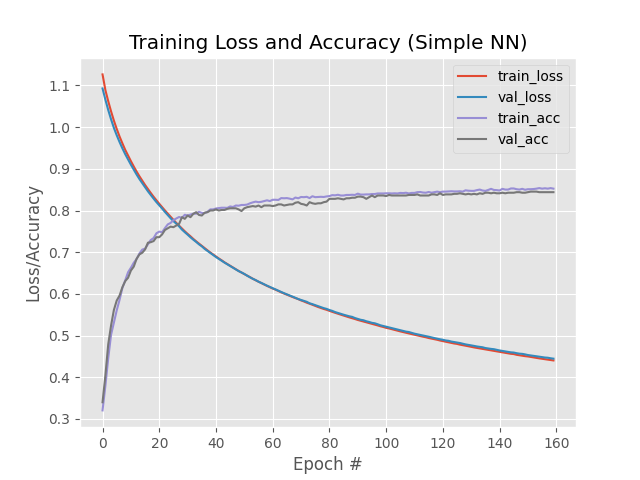

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save(model_path, save_format="h5")
f = open(label_path, "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


# Проверка обученной модели пользовательскими данными

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

from google.colab import files
from keras import models    

In [ ]:
def predictImage():
  # Добавляем интерфейс для загрузки изображений напрямую из блокнота
  uploaded = files.upload() 
  # загружаем входное изображение, меняем его размер на необходимый и выводим его
  image = cv2.imread(list(uploaded.keys())[0])
  output = image.copy()
  image = cv2.resize(image, (32, 32))
  cv2_imshow(image)

  # "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
  image = image.flatten()
  # масштабируем значения пикселей к диапазону [0, 1]
  image = image.astype("float") / 255.0
  image = image.reshape((1, image.shape[0]))

  # загружаем модель и бинаризатор меток
  model = models.load_model(model_path)
  lb = pickle.loads(open(label_path, "rb").read())

  # делаем предсказание на изображении
  preds = model.predict(image)
  print(lb.classes_, preds)

  # находим индекс метки класса с наибольшей вероятностью
  # соответствия
  i = preds.argmax(axis=1)[0]
  label = lb.classes_[i]

  # Добавляем на исходное изображение метку класса и вероятность прогноза
  text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
  cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)

  # показываем выходное изображение
  cv2_imshow(output)

['/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1067.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1032.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1038 (1).jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1052.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1031 (1).jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1009.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1039.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1038 (2).jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1033.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1044.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1004.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1007.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1005.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1008.jpg', '/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1006.jpg']
/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1067.jp

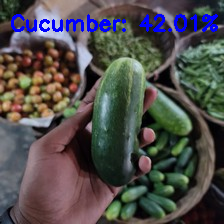

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1032.jpg
1/1 [==============================] - 0s 20ms/step
['Cucumber' 'Potato' 'Radish'] [[0.7541831  0.02859076 0.21722612]]


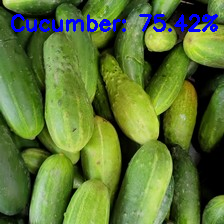

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1038 (1).jpg
1/1 [==============================] - 0s 19ms/step
['Cucumber' 'Potato' 'Radish'] [[0.72230655 0.05951559 0.21817787]]


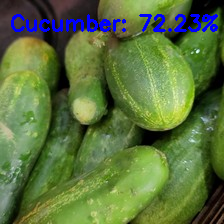

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1052.jpg
1/1 [==============================] - 0s 18ms/step
['Cucumber' 'Potato' 'Radish'] [[0.84189826 0.04772705 0.11037458]]


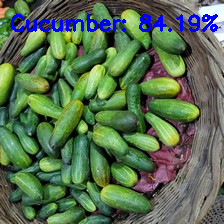

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1031 (1).jpg
1/1 [==============================] - 0s 18ms/step
['Cucumber' 'Potato' 'Radish'] [[0.77445775 0.04188969 0.18365254]]


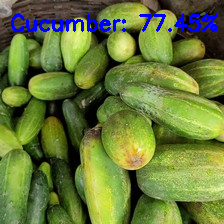

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1009.jpg
1/1 [==============================] - 0s 20ms/step
['Cucumber' 'Potato' 'Radish'] [[0.08216406 0.5075578  0.41027814]]


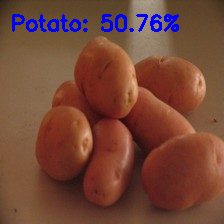

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1039.jpg
1/1 [==============================] - 0s 19ms/step
['Cucumber' 'Potato' 'Radish'] [[0.13040577 0.6839152  0.1856791 ]]


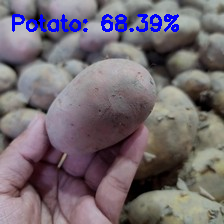

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1038 (2).jpg
1/1 [==============================] - 0s 26ms/step
['Cucumber' 'Potato' 'Radish'] [[0.08558235 0.90952104 0.00489664]]


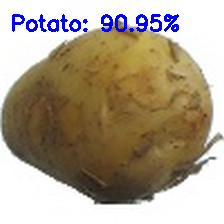

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1033.jpg
1/1 [==============================] - 0s 28ms/step
['Cucumber' 'Potato' 'Radish'] [[0.16056491 0.27166477 0.56777036]]


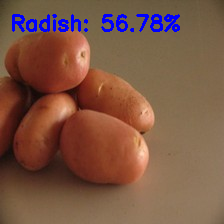

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1044.jpg
1/1 [==============================] - 0s 28ms/step
['Cucumber' 'Potato' 'Radish'] [[0.17639703 0.1863183  0.6372847 ]]


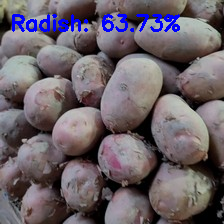

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1004.jpg
1/1 [==============================] - 0s 27ms/step
['Cucumber' 'Potato' 'Radish'] [[0.65083987 0.12783073 0.22132944]]


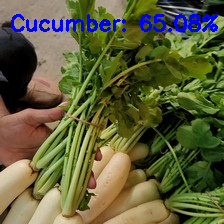

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1007.jpg
1/1 [==============================] - 0s 19ms/step
['Cucumber' 'Potato' 'Radish'] [[0.05453167 0.03384036 0.91162795]]


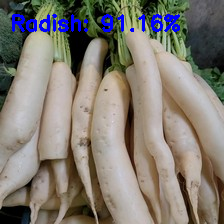

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1005.jpg
1/1 [==============================] - 0s 25ms/step
['Cucumber' 'Potato' 'Radish'] [[0.09472866 0.02053662 0.88473475]]


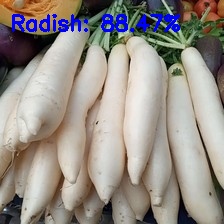

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1008.jpg
1/1 [==============================] - 0s 18ms/step
['Cucumber' 'Potato' 'Radish'] [[0.17277187 0.10587902 0.7213491 ]]


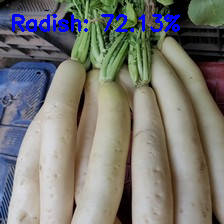

/content/drive/MyDrive/DEEP LEARN ^_^/Test_Images/1006.jpg
1/1 [==============================] - 0s 18ms/step
['Cucumber' 'Potato' 'Radish'] [[0.10978    0.10579365 0.78442633]]


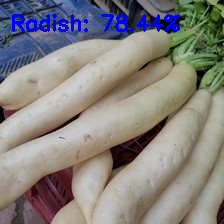

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib
from google.colab.patches import cv2_imshow
images = list(paths.list_images(test_images))


print(images)
for i in range(len(images)):
  print(images[i])
  # загружаем входное изображение, меняем его размер на необходимый и выводим его
  image = cv2.imread(images[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  output = image.copy()
  
  image = cv2.resize(image, (128, 128))

  image = image.flatten()

  image = image.astype("float") / 255.0
  image = image.reshape((1, image.shape[0]))


  preds = model.predict(image)
  print(lb.classes_, preds)

  arg = preds.argmax(axis=1)[0]
  label = lb.classes_[arg]


  text = "{}: {:.2f}%".format(label, preds[0][arg] * 100)
  cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

  cv2_imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))